In [ ]:
#3.2 使用torchvision导入和加载数据集
import torch
import torchvision
import torchvision.transforms as transforms

train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose(
        [
         transforms.ToTensor()
        ]
    )
)

train_loader = torch.utils.data.DataLoader(train_set)

In [ ]:
#3.3 数据集的访问
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)     # 设置打印行宽
print(len(train_set))
print(train_set.train_labels)
print(train_set.train_labels.bincount())

60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
# 查看单个样本
sample = next(iter(train_set))
print(len(sample))
print(type(sample))

2
<class 'tuple'>


In [ ]:
# 将sample解压成图像和标签
image = sample[0]
label = sample[1]
image.shape

torch.Size([1, 28, 28])

label: 9


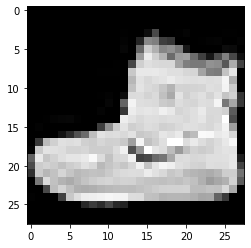

In [ ]:
# 显示图像和标签
plt.imshow(image.squeeze(), cmap='gray')    # 将[1, 28, 28]->[28,28]
print('label:', label)

In [ ]:
# 查看批量样本
batch= next(iter(train_loader))
print(len(batch))
print(type(batch))
images, labels = batch
print(images.shape)
print(labels.shape)

2
<class 'list'>
torch.Size([1, 1, 28, 28])
torch.Size([1])


torch.Size([3, 28, 28])
labels: tensor([9])


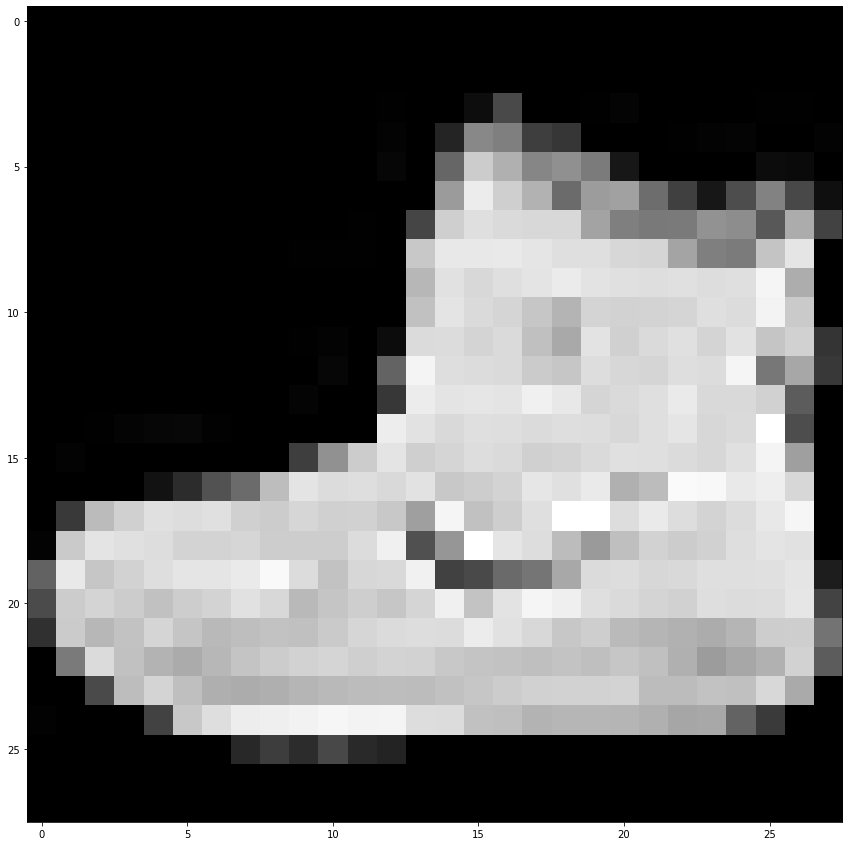

In [ ]:
# 画出一批的图像
grid= torchvision.utils.make_grid(images,nrow =10)
print(grid.shape)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid,(1,2,0)))   # 将张量转换成矩阵
print('labels:', labels)
# 可以通过改变batchsize来显示更多的数据

In [ ]:
#3.4.3 面向对象编程与pytorch的结合
# CNN网络的建立
import torch.nn as nn
class Network(nn.Module):   #()中加入nn.Module可以使得Network类继承Module基类中的所有功能
    def __init__(self):
        super(Network, self).__init__()     # 对继承的父类的属性进行初始化，使用父类的方法来进行初始化
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)        # 从卷积层传入线性层需要对张量flatten
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self, t):
        # implement the forward pass
        return t

In [ ]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [ ]:
#3.6 CNN的权重
# Network类没有扩展Module基类
import torch.nn as nn
class Network():
    def __init__(self):
        #super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self,t):
        # implement the forward pass
        return t

In [ ]:
network = Network()
network

In [ ]:
#如下所示，在未扩展module时，可使用repr函数实现正常输出
import torch.nn as nn
class Network():
    def __init__(self):
        #super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self,t):
        # implement the forward pass
        return t
    def __repr__(self):
        return "lizard"

In [ ]:
network = Network()
network

lizard

In [ ]:
#可使用点符号来访问指定的层
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
network.conv1.weight

Parameter containing:
tensor([[[[-0.0223,  0.1561,  0.1805,  0.1825,  0.0823],
          [ 0.0298, -0.1870, -0.0605,  0.1656, -0.1861],
          [ 0.0925,  0.0143, -0.0965,  0.0061,  0.0452],
          [ 0.0291, -0.0174,  0.0622, -0.1666,  0.1880],
          [-0.1204, -0.0600, -0.0077, -0.0812,  0.1154]]],


        [[[-0.1669,  0.1812,  0.0472,  0.1257,  0.1779],
          [ 0.1878,  0.0102,  0.0082, -0.1822, -0.1885],
          [-0.0200,  0.1552, -0.0428,  0.0080,  0.1506],
          [-0.1949,  0.0790,  0.0751, -0.1913,  0.0987],
          [ 0.0324,  0.1745, -0.1835, -0.0613,  0.0674]]],


        [[[ 0.0541,  0.0023,  0.1408, -0.0459, -0.0705],
          [ 0.0072,  0.0085,  0.1002, -0.1668,  0.1564],
          [-0.0309, -0.0589, -0.0584,  0.1743, -0.0818],
          [ 0.0448, -0.1871,  0.0517, -0.0956,  0.0367],
          [-0.1903,  0.0348,  0.1872, -0.1601, -0.0500]]],


        [[[ 0.0431, -0.0338, -0.0174,  0.1631,  0.0332],
          [ 0.1794, -0.0887, -0.1862,  0.0046, -0.1764

In [ ]:
# 输出conv1权重的形状
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [ ]:
# 对于全连接层，由于需要flatten的张量输入，故此时的权重张量是个秩为2的高度、宽度轴
network.fc1.weight.shape

torch.Size([120, 192])

为了追踪网络中的所有权重张量，pytorch有一个叫Parameter的类，该类扩展了Tensor类， 所以每一层的权重张量就是这个参数类的一个实例

权重矩阵定义了线性函数(线性映射)

In [ ]:
# 张量的乘法
in_features = torch.tensor([1,2,3,4],dtype=torch.float32)
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

In [ ]:
# CNN网络的建立
import torch.nn as nn
class Network(nn.Module):   #()中加入nn.Module可以使得Network类继承Module基类中的所有功能
    def __init__(self):
        super(Network, self).__init__()     # 对继承的父类的属性进行初始化，使用父类的方法来进行初始化
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)        # 从卷积层传入线性层需要对张量flatten
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self, t):
        # implement the forward pass
        return t

In [ ]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [ ]:
# 访问所有的参数
# 方法1：
for param in network.parameters():
  print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [ ]:
# 方法2： 
for name, param in network.named_parameters():
    print(name,'\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [ ]:
#3.7 pytorch可调用模块
#3.7.1 Linear的工作原理
# 1. 张量的乘法
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype = torch.float32)
weight_matrix.matmul(in_features)
# 可将上述的权重矩阵看作是一个线性映射（函数），其实现过程与pytorch中的线性层一样

tensor([30., 40., 50.])

In [ ]:
# 2. 线性层
fc = nn.Linear(in_features=4, out_features=3)
# pytorch 线性层通过将数字4和3传递给构造函数，以创建一个3x4的权重矩阵
# 查看in_features张量
fc(in_features)
# 此时的结果与上述不同是因为这里的weight_matrix是由随机值来初始化的

tensor([2.9846, 1.2203, 0.2373], grad_fn=<AddBackward0>)

In [ ]:
# 在parameter类中包装一个权重矩阵，以使得输出结果与1中一样
fc = nn.Linear(in_features=4, out_features=3)
fc.weight= nn.Parameter(weight_matrix)
fc(in_features)
# 此时的结果接近1中的结果却不精确，是因为由bias的存在

tensor([30.3114, 39.7463, 50.0112], grad_fn=<AddBackward0>)

In [ ]:
# 给bias传递一个false值，以得到精确的输出
fc = nn.Linear(in_features=4, out_features=3, bias =False)
fc.weight = nn.Parameter(weight_matrix)
fc(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

In [ ]:
#3.8 CNN前向方法的实现
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self,t):
        # (1) input layer
        t = t
        # (2) hidden conv layer1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (3) hidden conv layer2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # relu 和 max pooling 都没有权重；激活层和池化层的本质都是操作而非层；层与操作的不同之处在于，层有权重，操作没有
        #（4）hidden linear layer2
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        # (5) hidden linear layer2
        t = self.fc2(t)
        t = F.relu(t)
        # (6) output layer
        t = self.out(t)
        # t= F.softmax(t, dim=1)  # 这里暂不使用softmax，在训练中使用交叉熵损失可隐式的表示softmax
        # 在隐藏层中，通常使用relu作为非线性激活函数
        # 在输出层，有类别要预测时，使用

In [ ]:
#3.9 单张图像的预测
# 单张图像预测
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

# 设置打印格式
torch.set_printoptions(linewidth=120)

# 一、数据准备
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train = True
    ,download = True
    , transform = transforms.Compose([
        transforms.ToTensor()
    ])
)
# 二、创建网络
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features=10)
    def forward(self, t):
        # （1）Input Layer
        t = t
        # (2) hidden conv1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (3) hidden conv2 
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (4) hidden linear1
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        # (5) hidden linear2
        t = self.fc2(t)
        t = F.relu(t)
        # (6) output
        t = self.out(t)
        return t
        
# 调用network实例
torch.set_grad_enabled(False)    #关闭pytorch的梯度计算
network = Network()
sample = next(iter(train_set))
image, label = sample
print(image.shape)
# 显示图像和标签
#plt.imshow(image.squeeze(), cmap='gray')    # 将[1, 28, 28]->[28,28]
#print('label:', label)
# 如上我们得到的图像的形状为[1,28,28];而网络期望的张量是【batchsize,channels, height, width】
# 需要使用unsqueeze方法来为其增加一个维度
print(image.unsqueeze(0).shape)
# 对单张图像进行预测
pred = network(image.unsqueeze(0))
print(pred.shape)
print(pred.argmax(dim=1))
print(label)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
tensor([6])
9


In [ ]:
# 要想将预测值用概率表示，可以使用softmax
print(F.softmax(pred, dim=1))
print(F.softmax(pred, dim=1).sum())

tensor([[0.0924, 0.0896, 0.1107, 0.0926, 0.0956, 0.1090, 0.1124, 0.0951, 0.1012, 0.1014]])
tensor(1.0000)


In [ ]:
#3.10 单批次图像预测
# 调用network实例
torch.set_grad_enabled(False)
network = Network()
# 从dataloader中取出一批数据
data_loader  = torch.utils.data.DataLoader(train_set, batch_size=10)
batch = next(iter(data_loader))
images, labels = batch
print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [ ]:
pred = network(images)
print(pred.shape)
print(pred)

torch.Size([10, 10])
tensor([[ 0.1646, -0.0210, -0.0890, -0.1046, -0.0367, -0.0227,  0.0169,  0.1062, -0.0398,  0.0950],
        [ 0.1663, -0.0176, -0.0894, -0.1072, -0.0376, -0.0211,  0.0205,  0.1077, -0.0381,  0.0977],
        [ 0.1623, -0.0148, -0.0912, -0.1040, -0.0341, -0.0176,  0.0214,  0.1075, -0.0381,  0.0969],
        [ 0.1633, -0.0165, -0.0917, -0.1055, -0.0348, -0.0191,  0.0204,  0.1083, -0.0408,  0.0962],
        [ 0.1587, -0.0149, -0.0962, -0.1118, -0.0366, -0.0165,  0.0208,  0.1090, -0.0389,  0.0983],
        [ 0.1674, -0.0235, -0.0932, -0.1103, -0.0380, -0.0201,  0.0209,  0.1049, -0.0373,  0.0926],
        [ 0.1634, -0.0175, -0.0910, -0.1058, -0.0326, -0.0214,  0.0184,  0.1067, -0.0414,  0.0952],
        [ 0.1642, -0.0216, -0.0893, -0.1046, -0.0337, -0.0201,  0.0191,  0.1050, -0.0396,  0.0940],
        [ 0.1643, -0.0198, -0.0955, -0.1047, -0.0344, -0.0194,  0.0220,  0.1063, -0.0384,  0.0994],
        [ 0.1634, -0.0199, -0.0963, -0.1082, -0.0291, -0.0213,  0.0215,  0.1088

In [ ]:
print(pred.argmax(dim=1))
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


In [ ]:
print(F.softmax(pred, dim=1))
print(F.softmax(pred,dim=1).sum())

tensor([[0.1167, 0.0969, 0.0905, 0.0891, 0.0954, 0.0967, 0.1006, 0.1101, 0.0951, 0.1088],
        [0.1167, 0.0971, 0.0904, 0.0888, 0.0952, 0.0968, 0.1009, 0.1101, 0.0951, 0.1090],
        [0.1162, 0.0973, 0.0902, 0.0890, 0.0955, 0.0971, 0.1009, 0.1100, 0.0951, 0.1088],
        [0.1164, 0.0972, 0.0902, 0.0890, 0.0955, 0.0970, 0.1009, 0.1102, 0.0949, 0.1088],
        [0.1159, 0.0975, 0.0898, 0.0885, 0.0954, 0.0973, 0.1010, 0.1103, 0.0952, 0.1091],
        [0.1171, 0.0967, 0.0902, 0.0887, 0.0953, 0.0970, 0.1011, 0.1099, 0.0954, 0.1086],
        [0.1165, 0.0972, 0.0903, 0.0890, 0.0957, 0.0968, 0.1007, 0.1101, 0.0949, 0.1088],
        [0.1166, 0.0968, 0.0905, 0.0891, 0.0956, 0.0969, 0.1008, 0.1099, 0.0951, 0.1087],
        [0.1165, 0.0969, 0.0898, 0.0890, 0.0955, 0.0969, 0.1010, 0.1099, 0.0951, 0.1092],
        [0.1164, 0.0969, 0.0898, 0.0887, 0.0960, 0.0968, 0.1010, 0.1102, 0.0949, 0.1091]])
tensor(10.0000)
